In [1]:
import pandas as pd

data_path = 'creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Class', ylabel='count'>

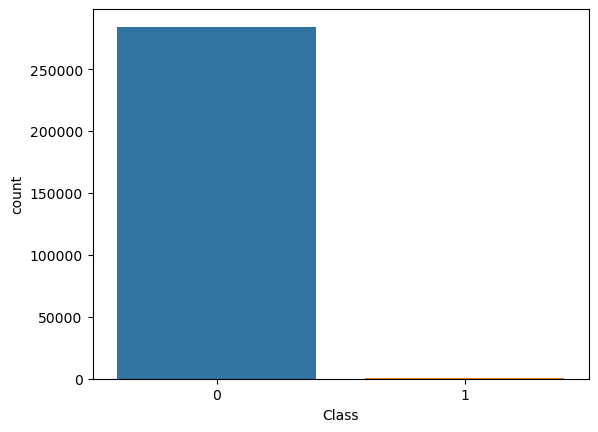

In [5]:
sns.countplot(x='Class',data=raw_data)

In [6]:
X = raw_data.iloc[:,1:-1]
y = raw_data.iloc[:,-1]

X.shape, y.shape

((284807, 29), (284807,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1234, stratify=y)

In [13]:
import numpy as np

print(np.unique(y_train, return_counts=True)[1][1] / len(y_train) * 100, '%')

0.17254870488152324 %


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred) : 
    acc = accuracy_score(y_test,pred)
    pre = precision_score(y_test,pred)
    re = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred)

    return acc,pre,re,f1,auc

In [15]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test,pred) : 
    confusion = confusion_matrix(y_test,pred)
    acc,pre,re,f1,auc = get_clf_eval(y_test, pred)

    print('==> Confusion matrix')
    print(confusion)
    print('====================')
    print('Accuracy : {0:.4f}, Precision : {1:.4f}'.format(acc,pre))
    print('Recall : {0:.4f}, F1 : {1:.4f}, AUC : {2:.4f}'.format(re,f1,auc))

In [18]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([85295,   148], dtype=int64))

In [16]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=1234, solver='liblinear')
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

==> Confusion matrix
[[85278    17]
 [   49    99]]
Accuracy : 0.9992, Precision : 0.8534
Recall : 0.6689, F1 : 0.7500, AUC : 0.8344


In [20]:
# %%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1234, max_depth=4)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

==> Confusion matrix
[[85283    12]
 [   34   114]]
Accuracy : 0.9995, Precision : 0.9048
Recall : 0.7703, F1 : 0.8321, AUC : 0.8851
CPU times: total: 3.19 s
Wall time: 3.6 s


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=1234, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

==> Confusion matrix
[[85290     5]
 [   26   122]]
Accuracy : 0.9996, Precision : 0.9606
Recall : 0.8243, F1 : 0.8873, AUC : 0.9121


In [22]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=1234, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average=False)
lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

==> Confusion matrix
[[85289     6]
 [   24   124]]
Accuracy : 0.9996, Precision : 0.9538
Recall : 0.8378, F1 : 0.8921, AUC : 0.9189


In [23]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

In [40]:
def get_result_pd(models, model_names, X_train,y_train,X_test,y_test):
    col_names = ['Accuracy','precision','recall','f1','roc_auc']

    tmp = []

    for model in models:
        tmp.append(get_result(model,X_train,y_train,X_test,y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [41]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression','DecisionTree', 'RandomForest','LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

In [42]:
result

,Accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999274,0.864407,0.689189,0.766917,0.844501
DecisionTree,0.999462,0.904762,0.770270,0.832117,0.885065
RandomForest,0.999625,0.953125,0.824324,0.884058,0.912127
LightGBM,0.999649,0.953846,0.837838,0.892086,0.918884


C:\Users\user\AppData\Local\Temp\ipykernel_42200\2942664128.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color='r');


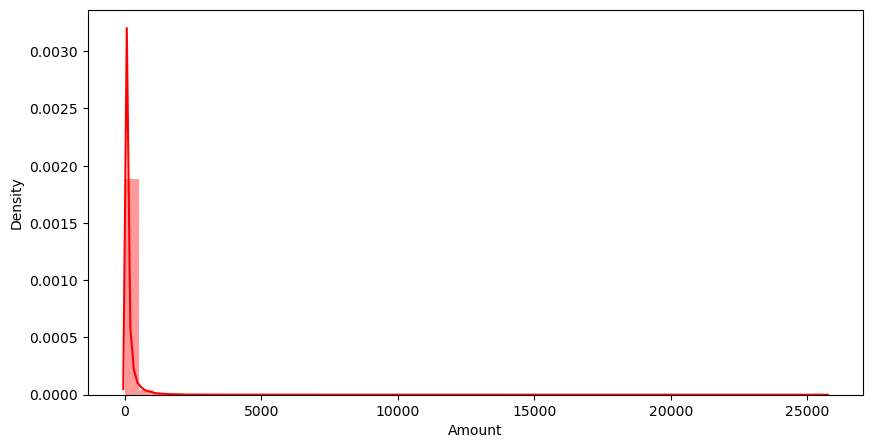

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['Amount'], color='r');

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:,1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy,y,test_size=0.3, random_state=1234, stratify=y)

In [46]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression','DecisionTree', 'RandomForest','LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

,Accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999228,0.853448,0.668919,0.750000,0.834360
DecisionTree,0.999462,0.904762,0.770270,0.832117,0.885065
RandomForest,0.999637,0.960630,0.824324,0.887273,0.912133
LightGBM,0.999684,0.954887,0.858108,0.903915,0.929019


In [34]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test,y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr,tpr,label=model_names[model])

    plt.plot([0,1],[0,1],'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now missing:
- Amount

  warnings.warn(message, FutureWarning)
c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now missing:
- Amount

  warnings.warn(message, FutureWarning)


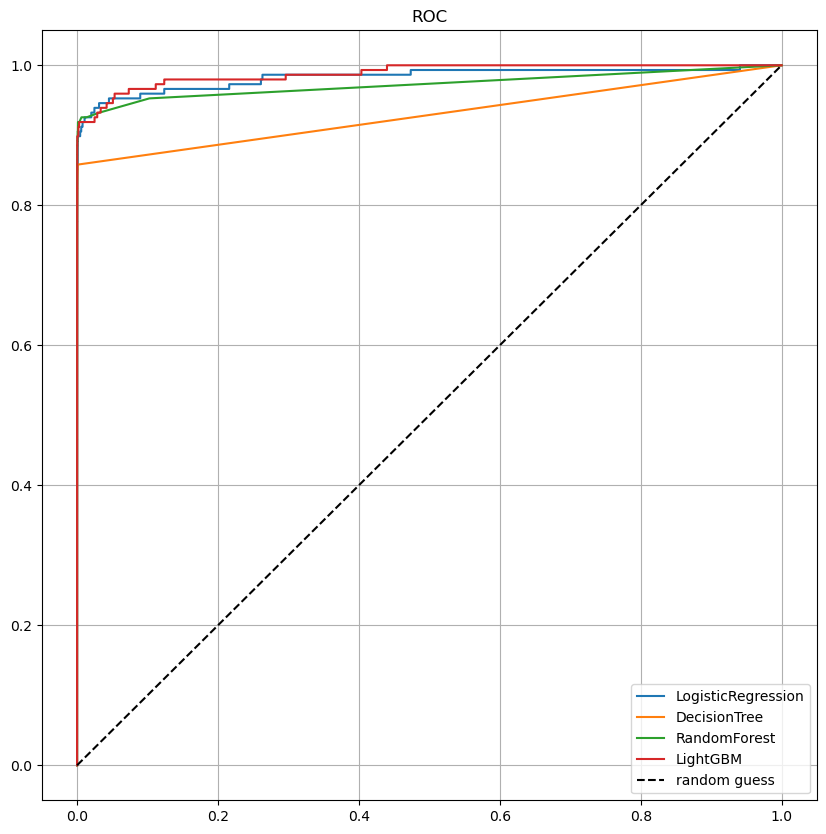

In [35]:
draw_roc_curve(models, model_names, X_test, y_test)

In [47]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log

C:\Users\user\AppData\Local\Temp\ipykernel_42200\2771092885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r');


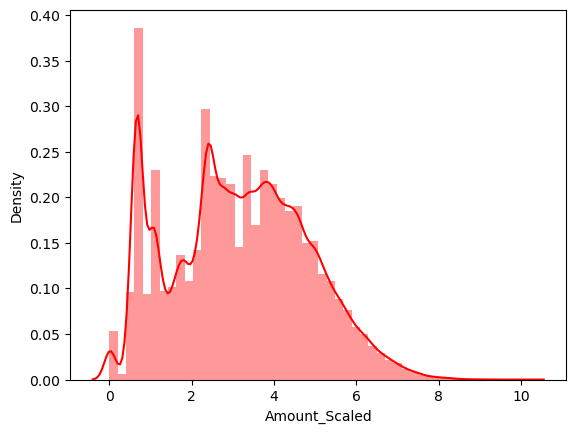

In [37]:
sns.distplot(raw_data_copy['Amount_Scaled'], color='r');

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy,y,test_size=0.3, random_state=1234, stratify=y)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression','DecisionTree', 'RandomForest','LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

,Accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999274,0.864407,0.689189,0.766917,0.844501
DecisionTree,0.999462,0.904762,0.770270,0.832117,0.885065
RandomForest,0.999625,0.953125,0.824324,0.884058,0.912127
LightGBM,0.999649,0.953846,0.837838,0.892086,0.918884


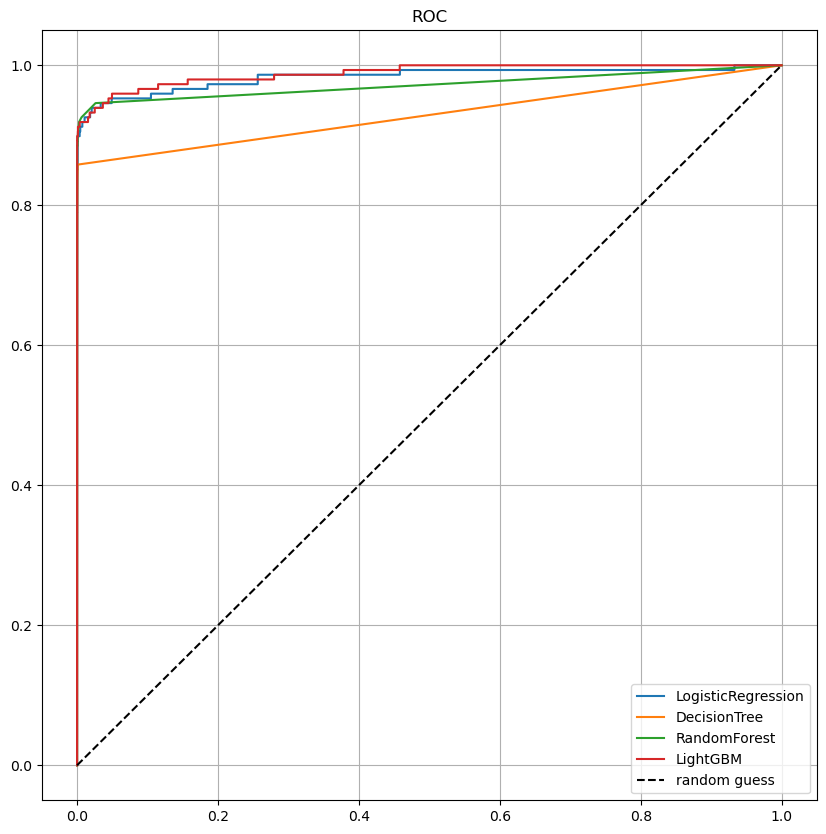

In [49]:
draw_roc_curve(models, model_names, X_test, y_test)

In [50]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]

    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight

    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [51]:
get_outlier(df=raw_data, column='V14')

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [52]:
outlier_index = get_outlier(df=raw_data, column='V14')
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

In [53]:
X = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1234, stratify=y)

In [54]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression','DecisionTree', 'RandomForest','LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

,Accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999239,0.864865,0.657534,0.747082,0.828679
DecisionTree,0.999333,0.844961,0.746575,0.792727,0.873170
RandomForest,0.999555,0.957627,0.773973,0.856061,0.886957
LightGBM,0.999625,0.959677,0.815068,0.881481,0.907505


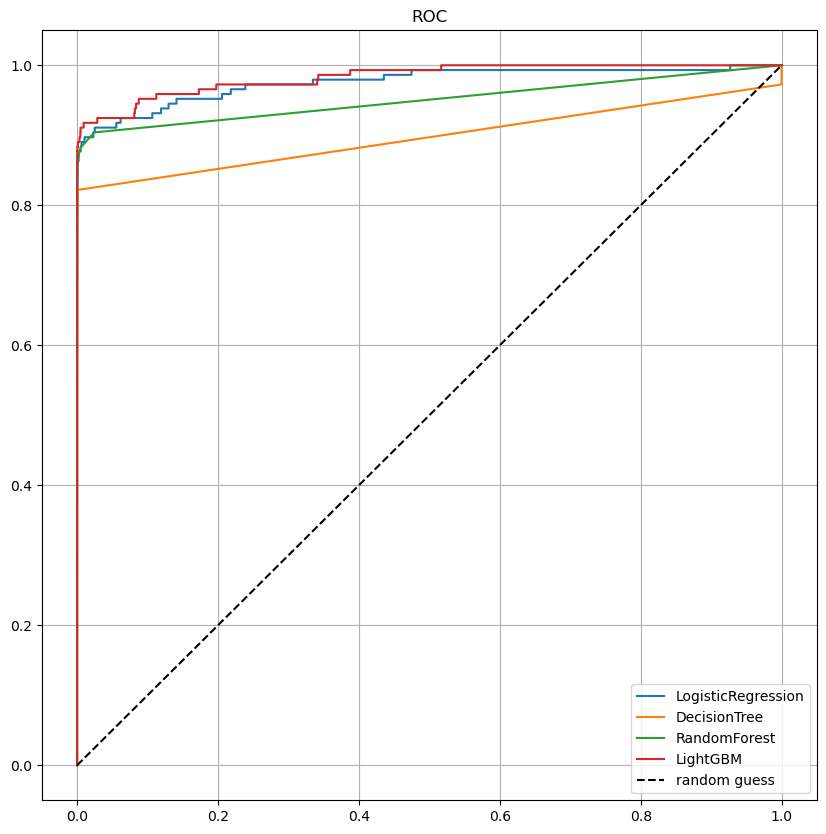

In [55]:
draw_roc_curve(models, model_names, X_test, y_test)

In [56]:
!pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 6.7 MB/s eta 0:00:00


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1234)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [60]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [61]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [63]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [64]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression','DecisionTree', 'RandomForest','LightGBM']

result = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

result

,Accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.972706,0.054605,0.917808,0.103077,0.945304
DecisionTree,0.959633,0.036746,0.897260,0.070601,0.928500
RandomForest,0.999508,0.882353,0.821918,0.851064,0.910865
LightGBM,0.999555,0.891304,0.842466,0.866197,0.921145


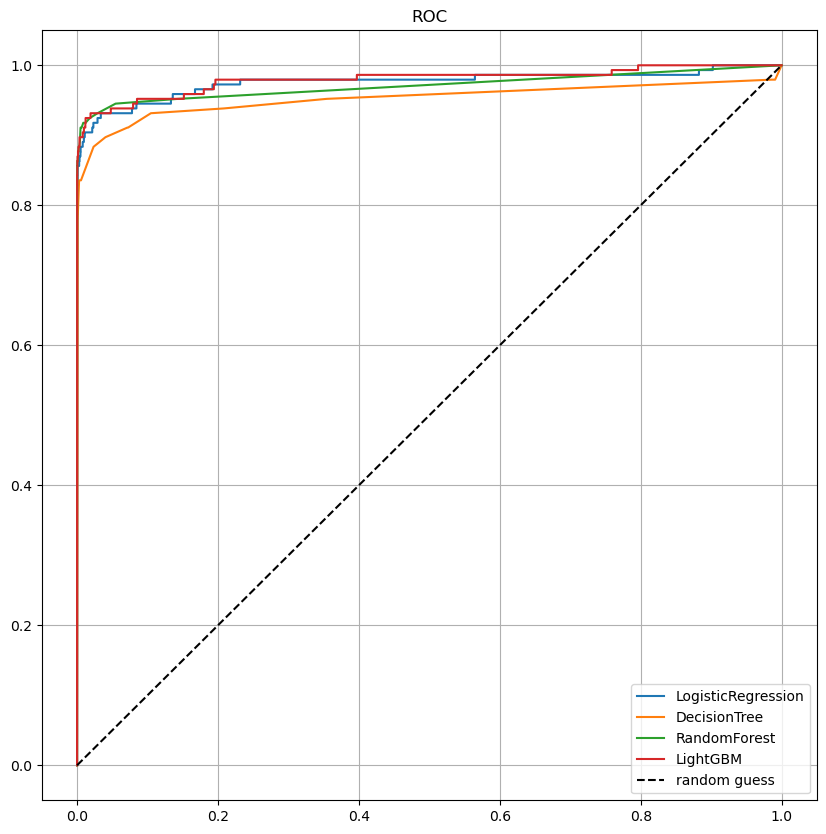

In [65]:
draw_roc_curve(models, model_names, X_test, y_test)